<a href="https://www.kaggle.com/code/rodolphojustino/k-means-mall-db?scriptVersionId=121597403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Author: Rodolpho Justino

This notebook is used to perform a k-means method analysis of a Mall DB

The Mall wants to segment its clients in order to direct their actions of marketing, the DB is available [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
mall_df = pd.read_csv("/kaggle/input/malldb/mall_customers.csv")
mall_df

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   gender  200 non-null    object
 2   age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


A first glance at our DB we see that it has some parameters like: Income (Thousand of USD per Year) and Score. We will use these parameters tu clusterize our DB. Also, there are no null or missing values in our DB

A first visualization of our dataset that we can use is to use the pairplot function, from seaborn, which makes a plot for each pair of variables in the Dataset.

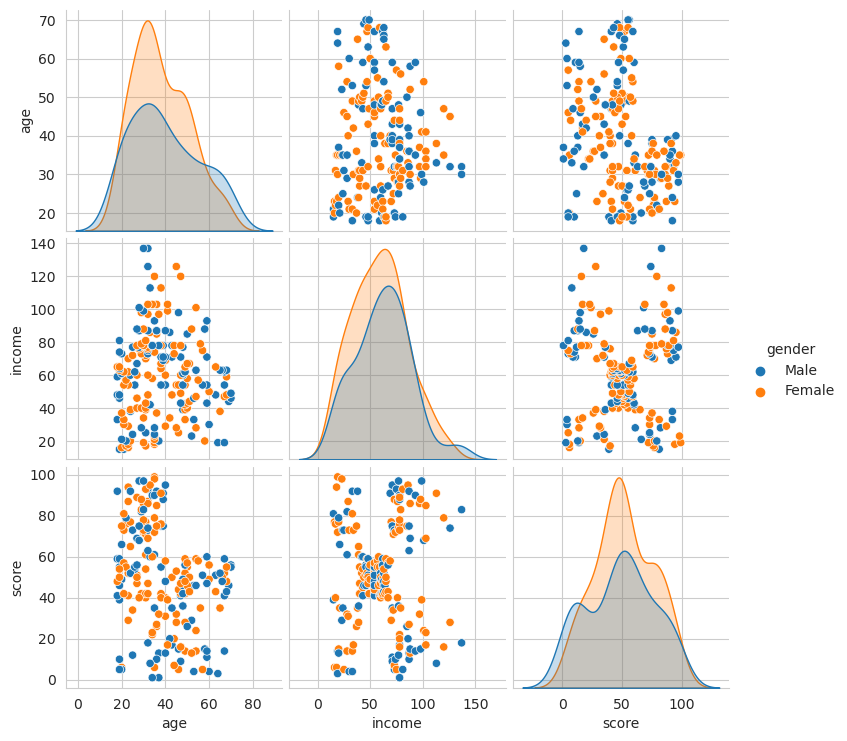

In [4]:
with sns.axes_style('whitegrid'):
    graph = sns.pairplot(data = mall_df.drop("id", axis = 1), hue = "gender")

* We see no evident segregation in the categories by gender

* There are already some visualizations that give us a glimpse of some clusters we can use. 

Anyway, we continue the analysis

Because the K-Means is an unsupervised method, there is no need to split the db in training and testing data;

Based on the graph of Income x Score we will suggest at first 5 clusters;

In [5]:
df = mall_df[["age", "income", "score"]]

We select the amount of clusters and train the model

In [6]:
model = KMeans()
model = KMeans(n_clusters = 5)
model = model.fit(df)

We now view the Dataset with the clusters and generate some visualizations

In [7]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns = ["cluster"])

In [8]:
df_clust = pd.concat([df, clusters], axis = 1)
df_clust.head()

,age,income,score,cluster
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


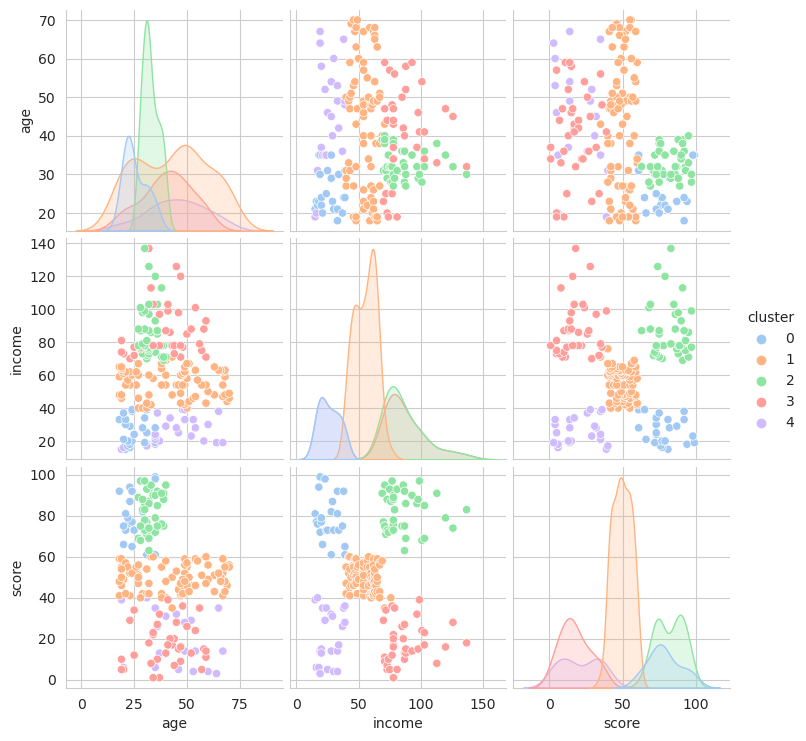

In [9]:
with sns.axes_style('whitegrid'):
    graph2 = sns.pairplot(data = df_clust, hue = 'cluster', palette = 'pastel')

Now, after the clusterization we can obtain some insights:

* Cluster 4 consists of a major amount of people in the range of 25 to 40 years of age;

* Also cluster 4 has the highest score and highest income, a strong further relation;

* Cluster 2 has mainly people of high score, but low income;

* Cluster 3 has clients with a intermediate score and income. 

We can also plot the clusters with their centroids


In [10]:
cluster_center = model.cluster_centers_
cluster_center = pd.DataFrame(cluster_center, columns = ["age", "income", "score"])

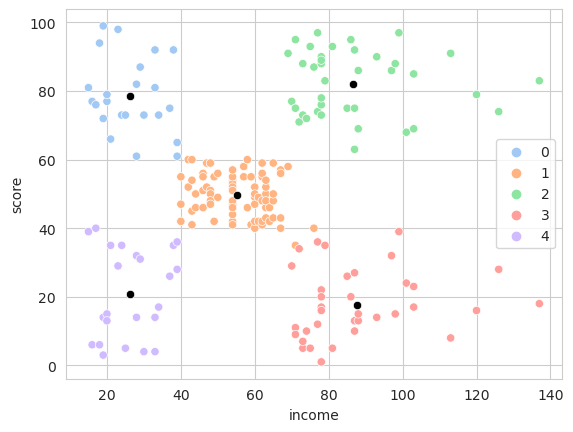

In [11]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots()
    sns.scatterplot(data = df_clust, x = "income", y = "score", hue = "cluster", palette = "pastel", ax = ax)
    sns.scatterplot(data = cluster_center, x = "income", y = "score", color = "black", ax = ax)

There is a method to check a good number of clusters for the analysis, and it is known as the **elbow method**, here, we check for a range of clusters and want to analyze how the WCSS (within clusters sum of squares) varies

In [12]:
wcss = []

for k in range (1,14):
    modelclust = KMeans (n_clusters = k)
    modelclust = modelclust.fit(df)
    wcss.append(modelclust.inertia_)

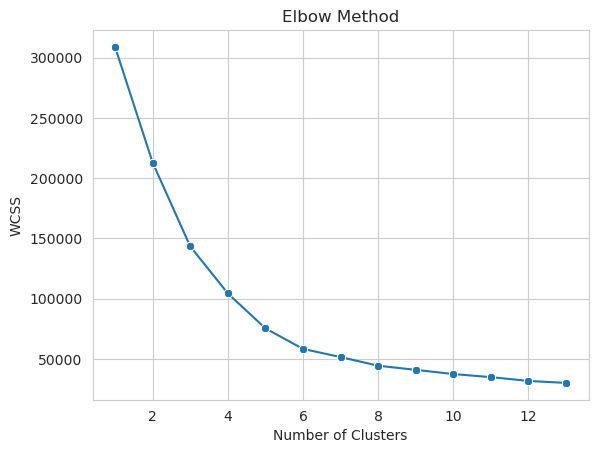

In [13]:
with sns.axes_style('whitegrid'):
    graph3 = sns.lineplot(x = range(1,14), y = wcss, marker = "8")
    graph3.set(title = 'Elbow Method', ylabel = "WCSS", xlabel = "Number of Clusters")

Here, some thoughts are:

* As the number of clusters increase, is natural that the WCSS decreases, as the WCSS is the value that represents the distance from the individual points to the cluster centroid itself. If we have one cluster, the value is going to be high because the distance from all the points to the centroid, the value of WCSS tends to zero as the number of centroids tends to be equal to the number of samples. If we have the same amount of centroids and points, the distance are null.

* We want to find a value that is enough to represent the data, we see that values of 4, 5 and 6 may give relevant results. Because from 6 clusters onwards, the WCSS do not change much

* ##  If we were to select 4 clusters:

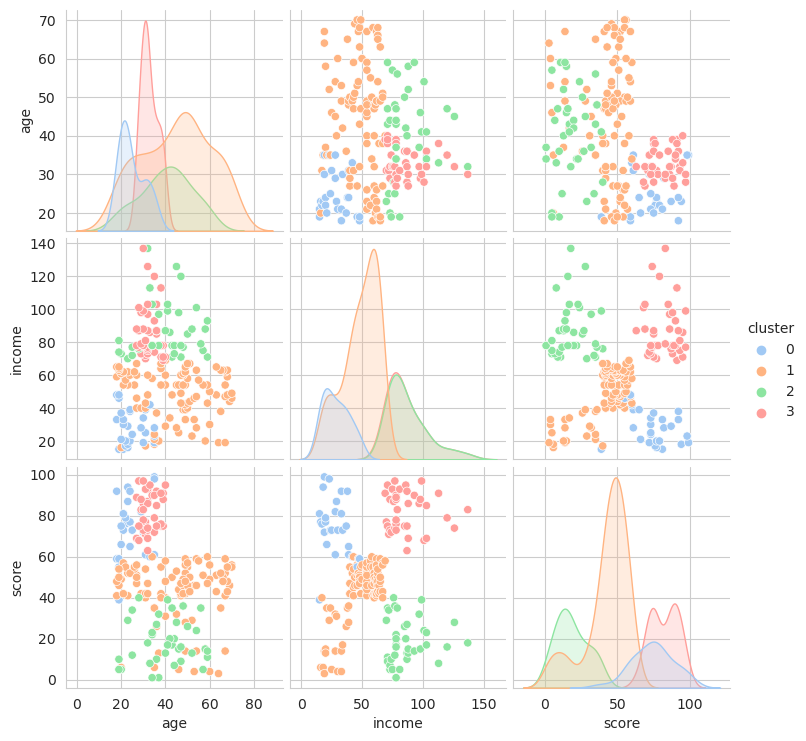

In [14]:
model4 = KMeans(n_clusters = 4)
model4 = model4.fit(df)

clusters4 = model4.labels_
cluster4_data = pd.concat([df, pd.DataFrame(clusters4, columns = ["cluster"])], axis = 1)

with sns.axes_style('whitegrid'):
    graph4 = sns.pairplot(data = cluster4_data, hue = 'cluster', palette = 'pastel')

With 4 clusters it's evident the difference in the graph of income x score, the clusters of high income and high score, high income and low score and low income and high score remain, whereas the low income low score is merged with the central area.

This could be problematic if we wanted to make a marketing campaing directed straight to a low-low profile, as it is merged with the medium-medium profile, and could be an impediment.

* ##  If we were to select 6 clusters:

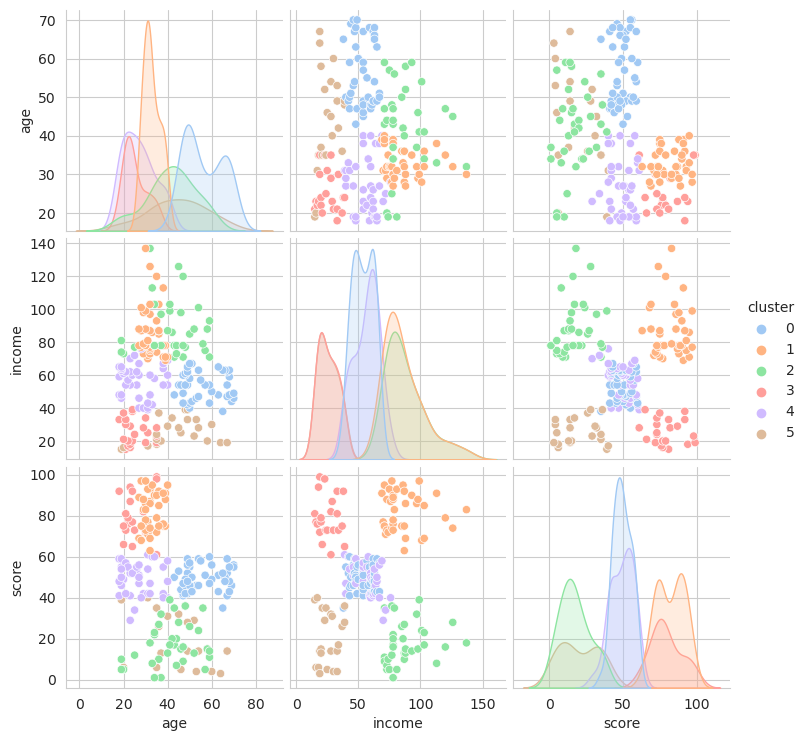

In [15]:
model6 = KMeans(n_clusters = 6)
model6 = model6.fit(df)

clusters6 = model6.labels_
cluster6_data = pd.concat([df, pd.DataFrame(clusters6, columns = ["cluster"])], axis = 1)

with sns.axes_style('whitegrid'):
    graph6 = sns.pairplot(data = cluster6_data, hue = 'cluster', palette = 'pastel')

* At first glance, we can see that the graph of income x score is, again, divide clearly and grouped by the clusters, and the different types of groups;
* The added cluster can be viewed when checking the score x age graph, for the mean score we now have 2 classes of middle score;
* Here, we add another layer to our analysis, the subdivision by age may help us in the future.

* ## Analyzing Group 2
### Group with high income, low score (potential to buy)

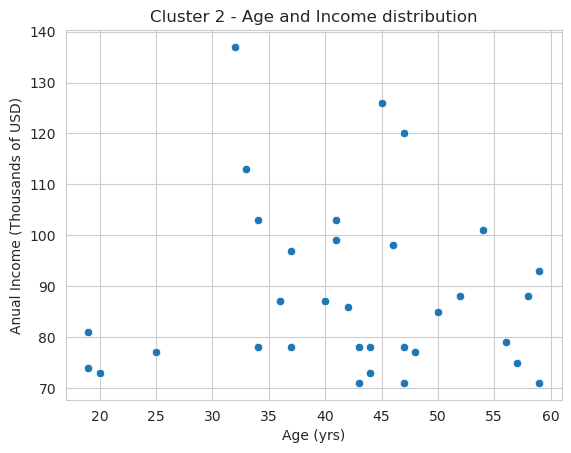

In [16]:
with sns.axes_style ('whitegrid'):
    grp2_graph = sns.scatterplot(data = cluster6_data.query('cluster == 2'), x = "age", y = "income")
    grp2_graph.set(title = 'Cluster 2 - Age and Income distribution', xlabel = "Age (yrs)", ylabel = "Anual Income (Thousands of USD)")
    #grp2_graph.get_legend().set_title("Cluster")

From the graph we can see a higher concentration of clients above 35 years, and below 110k USD/year, marketing campaigns focused on these groups could benefit the Mall

* ## Analyzing Groups 0 and 4
### Group with average income, average score, they have potential to stop frequenting the mall and also have potential to consume more

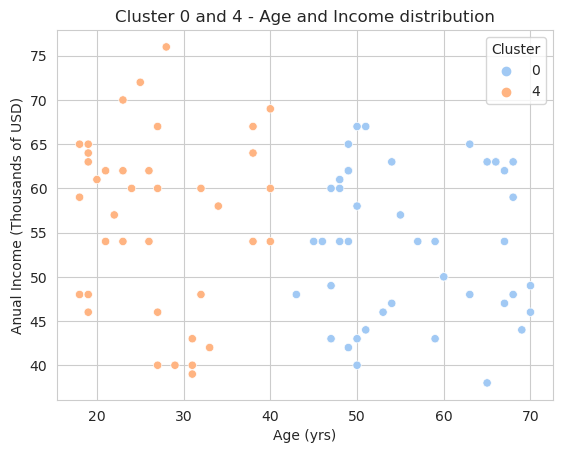

In [18]:
with sns.axes_style ('whitegrid'):
    grp13_graph = sns.scatterplot(data = cluster6_data.query('cluster == 0 or cluster == 4'), x = "age", y = "income", hue = "cluster", palette = "pastel")
    grp13_graph.set(title = 'Cluster 0 and 4 - Age and Income distribution', xlabel = "Age (yrs)", ylabel = "Anual Income (Thousands of USD)")
    grp13_graph.get_legend().set_title("Cluster")

In this scenario, It could be wise to divide the marketing campaigns for the different age groups, in order to increase the mall sales in this case.